In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize']=[12,8]

<function matplotlib.pyplot.show(*args, **kw)>

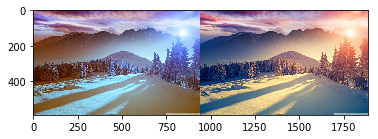

In [9]:
im = cv2.imread('./landscape.jpg')
(h,w,c) = im.shape
image  = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(np.hstack([im, image]))
plt.show

In [10]:
image= image.reshape((image.shape[0]*image.shape[1]),3)

In [11]:
from sklearn.cluster import MiniBatchKMeans

clt = MiniBatchKMeans(n_clusters = 16)
labels = clt.fit_predict(image)
print(labels)

[ 7  7  7 ... 11 11 11]


(16, 3)
(555427, 3)


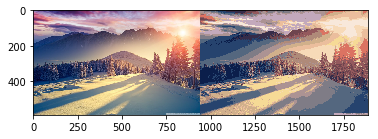

In [12]:
print(clt.cluster_centers_.astype('uint8').shape)
quant = clt.cluster_centers_.astype('uint8')[labels]
print(quant.shape)
quant= quant.reshape((h,w,3))
image= image.reshape((h,w,3))

plt.imshow(np.hstack([image,quant]))
plt.show()


True

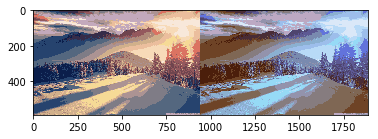

In [13]:
quant2 = cv2.cvtColor(quant,cv2.COLOR_RGB2BGR)
plt.imshow(np.hstack([quant, quant2]))
plt.show
cv2.imwrite('Compressed.jpg',quant2)